In [234]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import sys
from pathlib import Path

rcParams['figure.figsize'] = 3, 2
rcParams['font.size'] = 14
rcParams['axes.linewidth']=2
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

path = Path(os.getcwd())
project_path = path.parent.absolute()
figure_path = os.path.join(project_path, '_FIGURES')
sys.path.append(os.path.dirname(os.getcwd()))

In [171]:
def include_col_entries_by_substring(df, col, substrings):
    if isinstance(substrings, list):
        masks = []
        for substring in substrings:
            masks.append(df[col].str.contains(substring, na=False))
        mask = np.any(masks, axis=0)
        df = df[mask]
    else:
        df = df[df[col].str.contains(substrings, na=False)]
    return df

def exclude_col_entries_by_substring(df, col, substrings):
    if isinstance(substrings, list):
        for substring in substrings:
            df = df[~df[col].str.contains(substring, na=False)]
    else:
        df = df[~df[col].str.contains(substrings, na=False)]
    return df


In [101]:
d = r'C:\Users\Peter\Dropbox\olfaction_evolution\hemibrain'
conns = 'traced-total-connections.csv'
names = 'traced-neurons.csv'

dfw = pd.read_csv(os.path.join(d, conns))
dfn = pd.read_csv(os.path.join(d, names))

In [102]:
dfn.head()

,bodyId,type,instance
0,200326126,CL141,CL141_L
1,202916528,FS4C,FS4C(FQ12)_C4_R
2,203253072,FS4A,FS4A(AB)(FQ12)_C3_R
3,203253253,SMP505,SMP505(PDM22)_L
4,203257652,FS4C,FS4C(FQ12)_C6_R


ORNS

In [132]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'OR')
print(filtered['instance'].count())
print(filtered['instance'].value_counts())

2
ORN_DM6_L    1
ORN_DM3_L    1
Name: instance, dtype: int64


KENYON CELLS

In [133]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'KC')
print(filtered['instance'].count())
print(filtered['instance'].value_counts())

1931
KCg-m_R            590
KCab-m_R           354
KCab-c_R           252
KCab-s_R           223
KCa'b'-ap2_R       127
KCa'b'-m_R         119
KCg-d_R             99
KCa'b'-ap1_R        91
KCab-p_R            60
KCg-t_R              8
KCy(half)            2
KC(incomplete?)      2
KCg-s1(super)_R      1
KCg-s2(super)_R      1
KCg-s3_R             1
KCg-s4_R             1
Name: instance, dtype: int64


In [134]:
kcn = exclude_col_entries_by_substring(filtered, 'instance',
                                            ['KCg-s', 'KCy', 'incomplete'])
print(kcn['instance'].count())
print(kcn['instance'].value_counts())

1923
KCg-m_R         590
KCab-m_R        354
KCab-c_R        252
KCab-s_R        223
KCa'b'-ap2_R    127
KCa'b'-m_R      119
KCg-d_R          99
KCa'b'-ap1_R     91
KCab-p_R         60
KCg-t_R           8
Name: instance, dtype: int64


PNs

See https://elifesciences.org/articles/57443, Antennal lobe neuropil neurons
for nomenclature

In [178]:
filtered = dfn[dfn.instance.str.contains("PN", na=False)]
sorted(filtered['instance'].unique())

['DA1_lPN_R',
 'DA1_vPN_R',
 'DA2_lPN_R',
 'DA3_adPN_R',
 'DA4l_adPN_R',
 'DA4m_adPN_R',
 'DC1_adPN_R',
 'DC2_adPN_R',
 'DC3_adPN_R',
 'DC4_adPN_R',
 'DC4_vPN_R',
 'DL1_adPN_R',
 'DL2d_adPN_R',
 'DL2d_vPN_R',
 'DL2v_adPN_R',
 'DL3_lPN_R',
 'DL4_adPN_R',
 'DL5_adPN_R',
 'DM1_lPN_R',
 'DM2_lPN_R',
 'DM3_adPN_R',
 'DM3_vPN_R',
 'DM4_adPN_R',
 'DM4_vPN_R',
 'DM5_lPN_R',
 'DM6_adPN_R',
 'DP1l_adPN_R',
 'DP1l_vPN_R',
 'DP1m_adPN_R',
 'DP1m_vPN_R',
 'D_adPN_R',
 'LPN_R',
 'MZ_lv2PN_R',
 'MZ_lvPN(multiAL+SEZ)_R',
 'M_adPNm3_R',
 'M_adPNm4_R',
 'M_adPNm5_R',
 'M_adPNm6_R',
 'M_adPNm7_R',
 'M_adPNm8_R',
 'M_ilPN8t91_R',
 'M_ilPNm90_R',
 'M_imPNl92_R',
 'M_l2PN10t19_R',
 'M_l2PN3t18_R',
 'M_l2PNl20_R',
 'M_l2PNl21_R',
 'M_l2PNl22_R',
 'M_l2PNl23_R',
 'M_l2PNm14_R',
 'M_l2PNm15_R',
 'M_l2PNm16_R',
 'M_l2PNm17_R',
 'M_lPNm11A_R',
 'M_lPNm11B_R',
 'M_lPNm11C_R',
 'M_lPNm11D_R',
 'M_lPNm12_R',
 'M_lPNm13_R',
 'M_lv2PN9t49_R',
 'M_lvPNm24_R',
 'M_lvPNm25_R',
 'M_lvPNm26_R',
 'M_lvPNm27_R',
 'M_lvPNm28

In [320]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'PN')
# mechanosensory wedge projection neurons. Not antennal lobe
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'WEDPN')
# lateral posterior neuron, circadian clock neuron
filtered = exclude_col_entries_by_substring(filtered, 'instance', 'LPN')
# left antennal lobe neurons
filtered = exclude_col_entries_by_substring(filtered, 'instance', '_L')
# multiglomerular neurons
filtered = exclude_col_entries_by_substring(
    filtered,
    'instance',
    ['M_', 'MZ_lvPN', 'lv2PN'])

Uniglomerular PNs (either in the format of "gloname_" or "gloname+_", the latter suggesting that it targets a single glomerulus and another region)

In [321]:
mask = []
for v in filtered['instance']:
    v = v[:v.find('_')]
    if '+' not in v:
        mask.append(True)
    else:
        if v[-1] == '+':
            mask.append(True)
        else:
            mask.append(False)
uniglos = filtered[mask]
print(f'Number of unique uPNs: {len(np.unique(uniglos.instance))}')
sorted(np.unique(uniglos.instance))

Number of unique uPNs: 79


['DA1_lPN_R',
 'DA1_vPN_R',
 'DA2_lPN_R',
 'DA3_adPN_R',
 'DA4l_adPN_R',
 'DA4m_adPN_R',
 'DC1_adPN_R',
 'DC2_adPN_R',
 'DC3_adPN_R',
 'DC4_adPN_R',
 'DC4_vPN_R',
 'DL1_adPN_R',
 'DL2d_adPN_R',
 'DL2d_vPN_R',
 'DL2v_adPN_R',
 'DL3_lPN_R',
 'DL4_adPN_R',
 'DL5_adPN_R',
 'DM1_lPN_R',
 'DM2_lPN_R',
 'DM3_adPN_R',
 'DM3_vPN_R',
 'DM4_adPN_R',
 'DM4_vPN_R',
 'DM5_lPN_R',
 'DM6_adPN_R',
 'DP1l_adPN_R',
 'DP1l_vPN_R',
 'DP1m_adPN_R',
 'DP1m_vPN_R',
 'D_adPN_R',
 'VA1d_adPN_R',
 'VA1d_vPN_R',
 'VA1v_adPN_R',
 'VA1v_vPN_R',
 'VA2_adPN_R',
 'VA3_adPN_R',
 'VA4_lPN_R',
 'VA5_lPN_R',
 'VA6_adPN_R',
 'VA7l_adPN_R',
 'VA7m_lPN_R',
 'VC1_lPN_R',
 'VC2_lPN_R',
 'VC3l_adPN_R',
 'VC3m_lvPN_R',
 'VC4_adPN_R',
 'VC5_adPN_R',
 'VC5_lvPN_R',
 'VL1_ilPN',
 'VL1_vPN_R',
 'VL2a_adPN_R',
 'VL2a_vPN_R',
 'VL2p_adPN_R',
 'VL2p_vPN_R',
 'VM1_lPN_R',
 'VM2_adPN_R',
 'VM3_adPN_R',
 'VM4_adPN_R',
 'VM4_lvPN_R',
 'VM5d_adPN_R',
 'VM5v_adPN_R',
 'VM7d_adPN_R',
 'VM7v_adPN_R',
 'VP1d_il2PN(dALT)',
 'VP1l+_lvPN_R',
 'VP1

Biglo PNs

In [322]:
mask = []
for v in filtered['instance']:
    v = v[:v.find('_')]
    if '+' not in v:
        mask.append(False)
    else:
        if v[-1] == '+':
            mask.append(False)
        else:
            mask.append(True)
biglos = filtered[mask]
print(f'Number of unique bigloPNs: {len(np.unique(biglos.instance))}')
sorted(np.unique(biglos.instance))


Number of unique bigloPNs: 13


['VP1d+VP4_l2PN1_R',
 'VP1d+VP4_l2PN2(lALT)_R',
 'VP1l+VP3_ilPN',
 'VP1m+VP2_lvPN1_R',
 'VP1m+VP2_lvPN2_R',
 'VP1m+VP5_ilPN',
 'VP2+VC5_l2PN(lALT)_R',
 'VP2+Z_lvPN(uniAL+SEZ)_R',
 'VP3+VP1l_ivPN',
 'VP4+VL1_l2PN(t3ALT)_R',
 'VP5+VP2_l2PN(t10ALT)_R',
 'VP5+VP3_l2PN(t10ALT)_R',
 'VP5+Z_adPN(uniAL+SEZ)_R']

Multiglomerular PNs

In [323]:
filtered = include_col_entries_by_substring(dfn, 'instance', 'PN')
multiglos = include_col_entries_by_substring(
    filtered,
    'instance',
    ['M_', 'MZ_'])
print(f'Number of unique mPNs: {len(np.unique(multiglos.instance))}')
sorted(np.unique(multiglos.instance))

Number of unique mPNs: 98


['MZ_lv2PN_R',
 'MZ_lvPN(multiAL+SEZ)_R',
 'M_adPNm3_R',
 'M_adPNm4_R',
 'M_adPNm5_R',
 'M_adPNm6_R',
 'M_adPNm7_R',
 'M_adPNm8_R',
 'M_ilPN8t91_R',
 'M_ilPNm90_R',
 'M_imPNl92_R',
 'M_l2PN10t19_R',
 'M_l2PN3t18_R',
 'M_l2PNl20_R',
 'M_l2PNl21_R',
 'M_l2PNl22_R',
 'M_l2PNl23_R',
 'M_l2PNm14_R',
 'M_l2PNm15_R',
 'M_l2PNm16_R',
 'M_l2PNm17_R',
 'M_lPNm11A_R',
 'M_lPNm11B_R',
 'M_lPNm11C_R',
 'M_lPNm11D_R',
 'M_lPNm12_R',
 'M_lPNm13_R',
 'M_lv2PN9t49_R',
 'M_lvPNm24_R',
 'M_lvPNm25_R',
 'M_lvPNm26_R',
 'M_lvPNm27_R',
 'M_lvPNm28_R',
 'M_lvPNm29_R',
 'M_lvPNm30_R',
 'M_lvPNm31_R',
 'M_lvPNm32_R',
 'M_lvPNm33_R',
 'M_lvPNm34_R',
 'M_lvPNm35_R',
 'M_lvPNm36_R',
 'M_lvPNm37_R',
 'M_lvPNm38_R',
 'M_lvPNm39_R',
 'M_lvPNm40_R',
 'M_lvPNm41_R',
 'M_lvPNm42_R',
 'M_lvPNm43_R',
 'M_lvPNm44_R',
 'M_lvPNm45_R',
 'M_lvPNm46_R',
 'M_lvPNm47_R',
 'M_lvPNm48_R',
 'M_smPN6t2_L',
 'M_smPNm1_L',
 'M_spPN4t9_R',
 'M_spPN5t10(PVM01)_L',
 'M_spPN5t10_R',
 'M_vPNml50_R',
 'M_vPNml51_R',
 'M_vPNml52_R',
 'M_vPNm

In [324]:
uniglo_id =uniglos.bodyId.to_numpy()
biglo_id =biglos.bodyId.to_numpy()
multiglo_id =multiglos.bodyId.to_numpy()
kc_id = kcn.bodyId.to_numpy()

RESULTS:

Recurrent connections between KCs are extensive???

In [325]:
mask1 = np.isin(dfw.bodyId_pre, kc_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of recurrent connections per KC: '
      f'{np.sum(mask) / len(dfw[mask].bodyId_pre.unique())}')


Average number of recurrent connections per KC: 175.7155486219449


Connections from biglo and multiglomerular PNs to KCs are negligible

In [326]:
mask1 = np.isin(dfw.bodyId_pre, biglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of biglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

mask1 = np.isin(dfw.bodyId_pre, multiglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of multiglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

Average number of biglo connections to each KC: 0.25637025481019243
Average number of multiglo connections to each KC: 0.14716588663546543


Connections from uniglo PNs to KCs are around ~6

In [328]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
print(f'Average number of uniglo connections to each KC: '
      f'{np.sum(mask) / len(kc_id)}')

Average number of uniglo connections to each KC: 6.03328133125325


Distributions of K

In [344]:
# import scipy.stats
#
# n = 50
# scipy.stats.binom.stats(n, p)

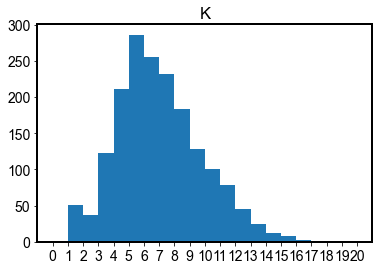

In [345]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
pn2kc = dfw[mask]

kc_stats = pn2kc.groupby(['bodyId_post']).count()
input_degree = kc_stats['bodyId_pre']

plt.figure(figsize=(6, 4))
plt.hist(input_degree, range=[0, 20], bins=20)
plt.xticks(np.arange(0, 21));
plt.title('K');

Distribution of output connections per PN is most definitely not equal between
 different glomeruli

Text(0.5, 1.0, 'Number of output connections per glomerulus (sorted by count)')

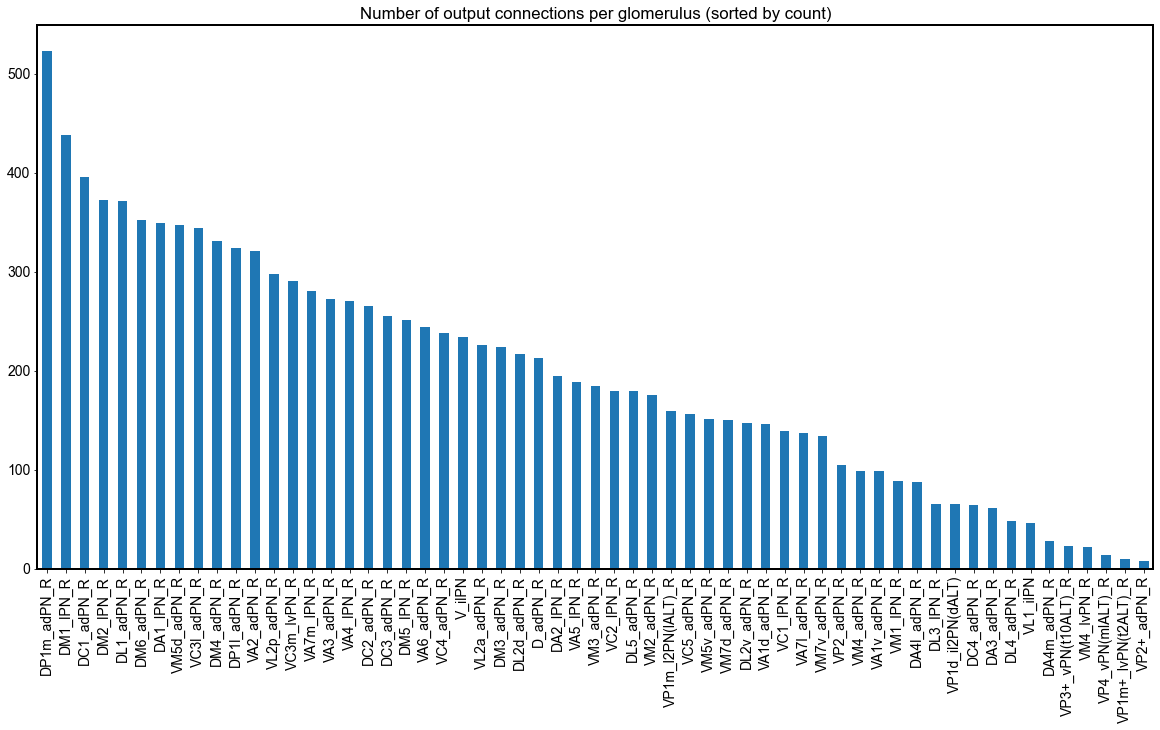

In [332]:
mask1 = np.isin(dfw.bodyId_pre, uniglo_id)
mask2 = np.isin(dfw.bodyId_post, kc_id)
mask = np.all([mask1, mask2], axis=0)
pn2kc = dfw[mask]

uniglos = uniglos.sort_values(by='instance')
id_to_glo = dict(zip(uniglos['bodyId'], uniglos['instance']))
glos = pn2kc.bodyId_pre.map(id_to_glo)
a = glos.value_counts()


f = plt.figure(figsize=(20, 10))
ax = plt.gca()
a.plot(kind='bar', ax=ax)
plt.title('Number of output connections per glomerulus (sorted by count)')


Text(0.5, 1.0, 'Number of output connections per glomerulus (sorted by name)')

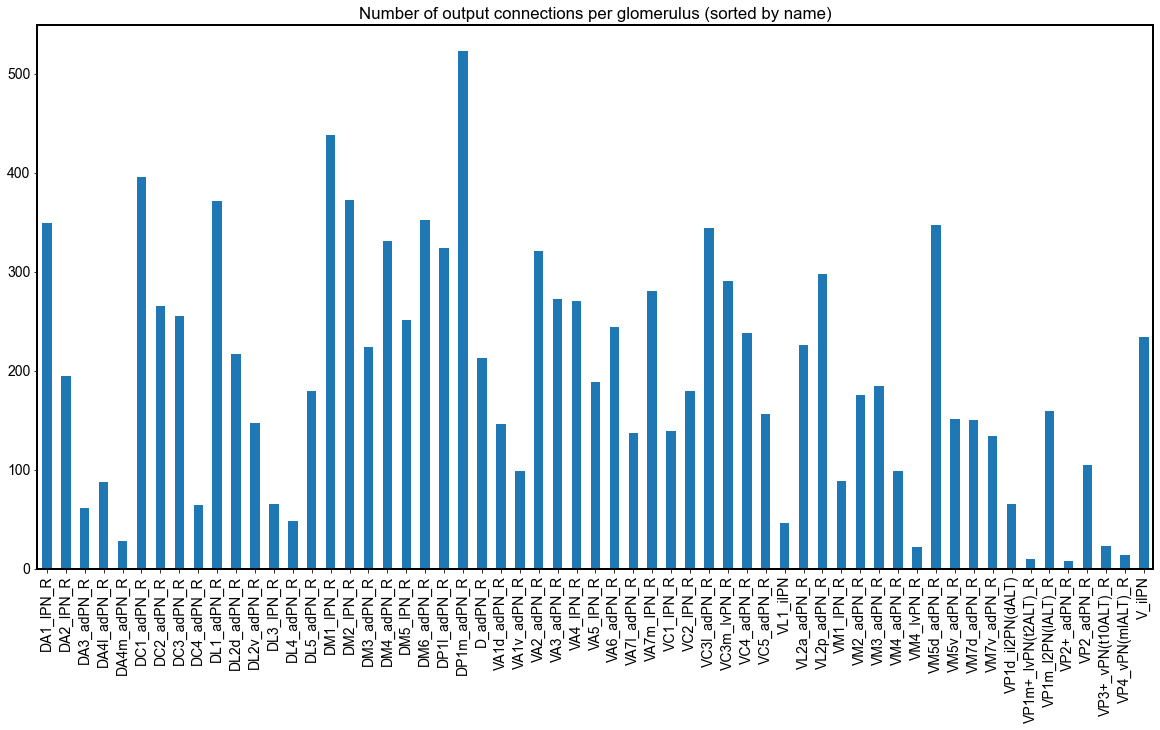

In [333]:
b = a.sort_index()
f = plt.figure(figsize=(20, 10))
ax = plt.gca()
b.plot(kind='bar', ax=ax)
plt.title('Number of output connections per glomerulus (sorted by name)')